In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from joblib import load
from utils import TransactionDataset
import pandas as pd

In [32]:
lg_mmodel = load("./models_exports/logistic_regression_classifier.joblib")
knn_model = load("./models_exports/knn_classifier.joblib")
nb_model = load("./models_exports/naive_bayes_classifier.joblib")
svc_model = load("./models_exports/support_vector_classifier.joblib")
rf_model = load("./models_exports/random_forest_classifier.joblib")
voting_model = load("./models_exports/voting_ensamble.joblib")

In [33]:
data = TransactionDataset().get_training_test_split()

In [34]:
lg_preds = lg_mmodel.predict(data.TESTING.predictors)
knn_preds = knn_model.predict(data.TESTING.predictors)
nb_preds = nb_model.predict(data.TESTING.predictors)
svc_preds = svc_model.predict(data.TESTING.predictors)
rf_preds = rf_model.predict(data.TESTING.predictors)
voting_preds = voting_model.predict(data.TESTING.predictors)

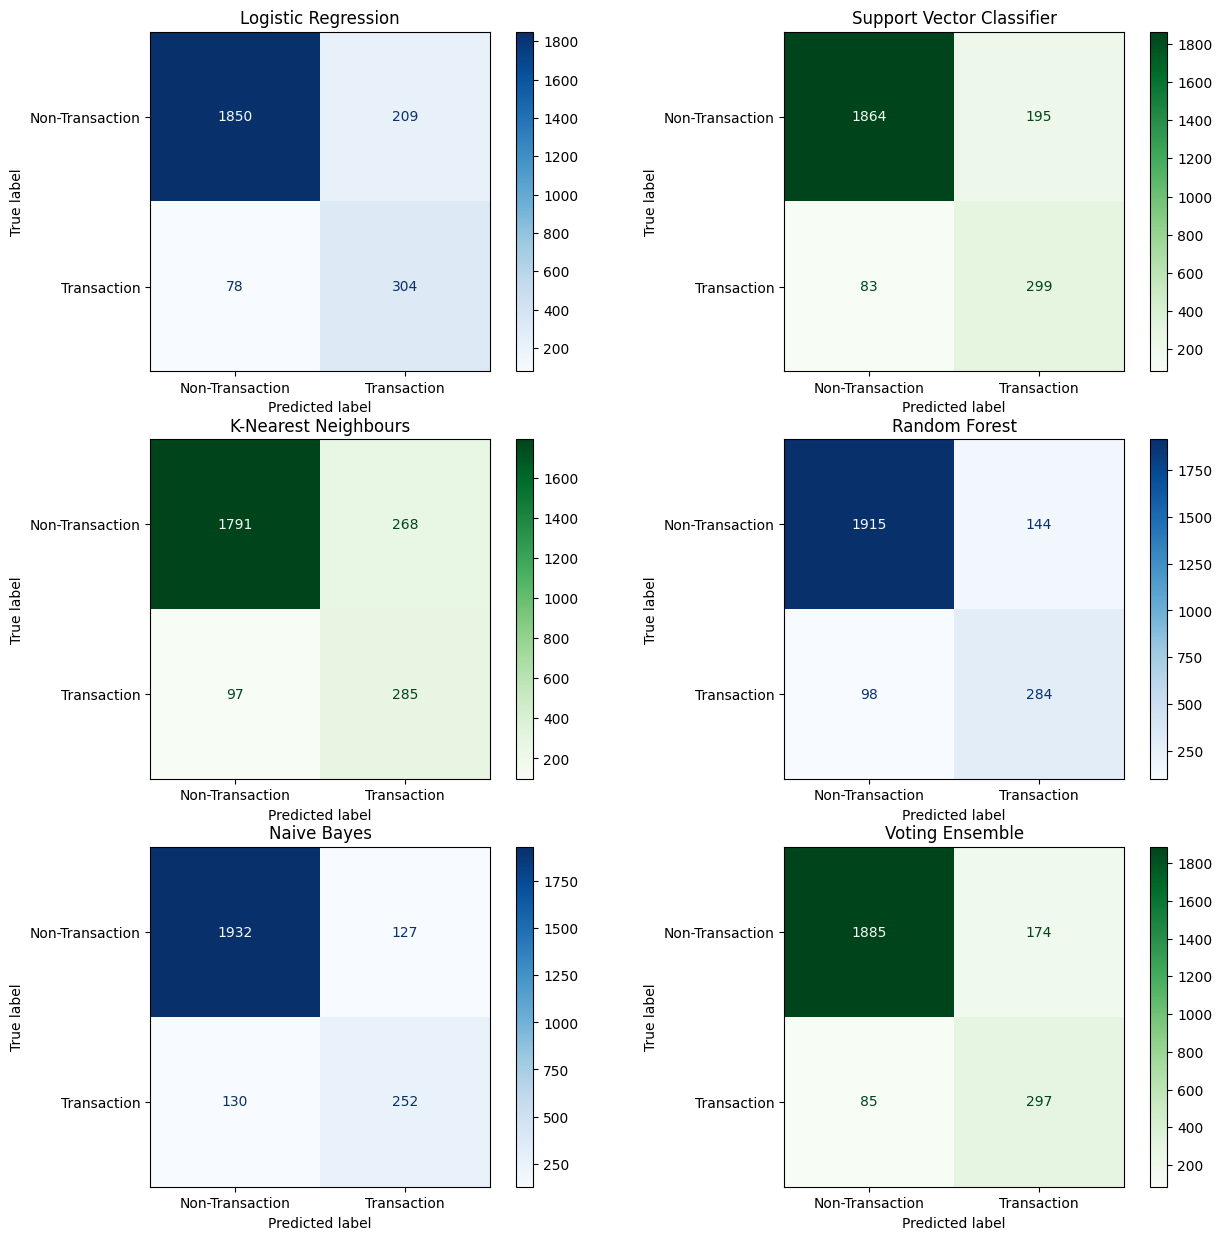

In [39]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize= (15, 15))

ConfusionMatrixDisplay.from_predictions(data.TESTING.outcome, lg_preds, cmap="Blues", display_labels=["Non-Transaction", "Transaction"], ax=axs[0,0])
ConfusionMatrixDisplay.from_predictions(data.TESTING.outcome, knn_preds, cmap="Greens", display_labels=["Non-Transaction", "Transaction"], ax=axs[1,0])
ConfusionMatrixDisplay.from_predictions(data.TESTING.outcome, nb_preds, cmap="Blues", display_labels=["Non-Transaction", "Transaction"], ax=axs[2,0])
ConfusionMatrixDisplay.from_predictions(data.TESTING.outcome, svc_preds, cmap="Greens", display_labels=["Non-Transaction", "Transaction"], ax=axs[0,1])
ConfusionMatrixDisplay.from_predictions(data.TESTING.outcome, rf_preds, cmap="Blues", display_labels=["Non-Transaction", "Transaction"], ax=axs[1,1])
ConfusionMatrixDisplay.from_predictions(data.TESTING.outcome, voting_preds, cmap="Greens", display_labels=["Non-Transaction", "Transaction"], ax=axs[2,1])

axs[0, 0].set_title("Logistic Regression")
axs[1, 0].set_title("K-Nearest Neighbours")
axs[2, 0].set_title("Naive Bayes")
axs[0, 1].set_title("Support Vector Classifier")
axs[1, 1].set_title("Random Forest")
axs[2, 1].set_title("Voting Ensemble")

fig.savefig("./confusion_matrices/confusion_matrices.png");